ver: 20220921.1833

In [1]:
# Initialization for this notebook.

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

# Un-comment the following line to use interactive matplotlib widget.
# %matplotlib widget

# Returns a n seqence based on the offset provided.
seq_n = lambda seq, noff: np.arange(seq.size) - noff

def stem_complex(ax: mpl_toolkits.mplot3d.Axes3D, x, y_real, y_imag, color='b'):
    """Draw a stem plot of complex values in 3D."""
    # plotting the stems
    for i in range(len(x)):
        ax.plot([x[i], x[i]], [0, y_real[i]], [0, y_imag[i]], 
          '-', linewidth=2, color=color, alpha=.5)

    # plotting a circle on the top of each stem
    ax.plot(x, y_real, y_imag, 'o', markersize=8, 
            markerfacecolor='none', color=color,label='ib')

# 1.1 离散时间信号———序列

## 1.1.5 几种常用的典型序列

### 单位抽样(单位冲激，单位脉冲)序列：

$$
\delta(n) = \begin{cases}
    1, \quad n=0  \\
    0, \quad n \neq 0  
\end{cases}
$$

In [2]:
# Define a general function to generate the sequence.
seq_delta = lambda n_min, n_max: \
    (np.array([1 if n==0 else 0 for n in range(n_min, n_max+1)]), \
     0 - n_min)

delta = [0 0 0 1 0 0 0] , noff_delta = 3


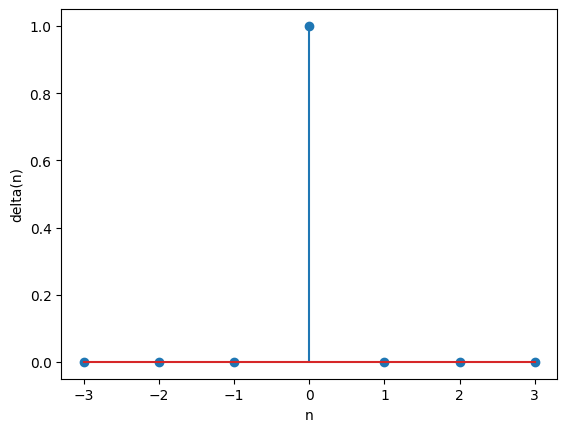

In [3]:
# Generate the sequence
(delta, noff_delta) = seq_delta(n_min = -3, n_max = 3)

print("delta =", delta, ", noff_delta =", noff_delta)

# Plot the sequence
fig, ax = plt.subplots()
ax.stem(seq_n(delta, noff_delta), delta)
ax.set_xlabel('n')
ax.set_ylabel('delta(n)');

### 单位阶跃序列：

$$
u(n) = \begin{cases}
    1, \quad n \geqslant 0  \\
    0, \quad n < 0  
\end{cases}
$$

In [4]:
# Define a general function to generate the sequence.
seq_unit_step = lambda n_min, n_max: \
    (np.array([0 if n<0 else 1 for n in range(n_min, n_max+1)]), \
     0 - n_min)

u = [0 0 0 1 1 1 1] , noff_u = 3


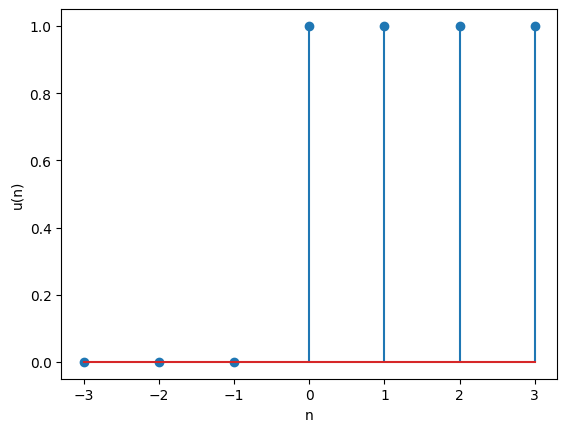

In [5]:
# Generate the sequence
(u, noff_u) = seq_unit_step(n_min = -3, n_max = 3)

print("u =", u, ", noff_u =", noff_u)

# Plot the sequence
fig, ax = plt.subplots()
ax.stem(seq_n(u, noff_u), u)
ax.set_xlabel('n')
ax.set_ylabel('u(n)');

### 矩形序列：

$$
R_N(n) = \begin{cases}
    1, \quad 0 \leqslant n \leqslant N-1  \\
    0, \quad \text{其他}n
\end{cases}
$$

其中，$N$为大于0的整数

In [6]:
# Define a general function to generate the sequence.
seq_R_N = lambda N, n_min, n_max: \
    (np.array([0 if (n<0 or n>=N) else 1 for n in range(n_min, n_max+1)]), \
     0 - n_min)

R_N = [0 0 0 1 1 1 0] , noff_R_N = 3


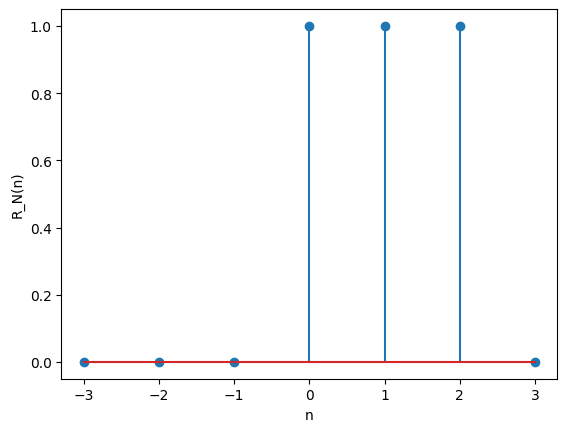

In [7]:
# Generate the sequence
(R_N, noff_R_N) = seq_R_N(N = 3, n_min = -3, n_max = 3)

print("R_N =", R_N, ", noff_R_N =", noff_R_N)

# Plot the sequence
fig, ax = plt.subplots()
ax.stem(seq_n(R_N, noff_R_N), R_N)
ax.set_xlabel('n')
ax.set_ylabel('R_N(n)');

### 实指数序列

$$ x(n) = a^n u(n), \quad a \text{为实数} $$

In [8]:
# Define a general function to generate the sequence.
seq_real_exp = lambda a, n_min, n_max: \
    (np.array([0 if n<0 else a**n for n in range(n_min, n_max+1)]), \
     0 - n_min)

x = [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00 -2.0e-01  4.0e-02
 -8.0e-03  1.6e-03 -3.2e-04] , noff_x = 5


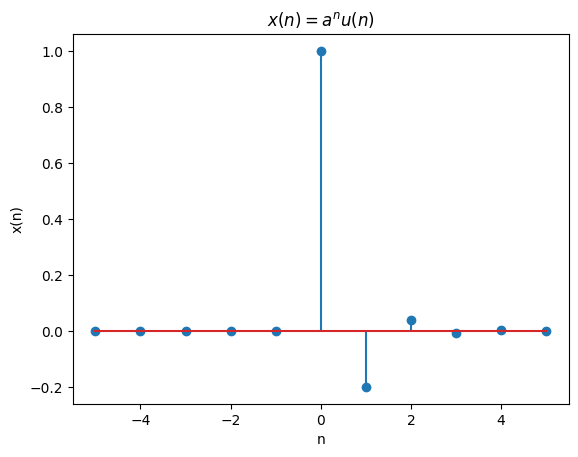

In [23]:
# Parameters
(n_min, n_max) = (-5, 5)    # The range of n
a = -1.2

# Generate the sequence
(x, noff_x) = seq_real_exp(a = -0.2, n_min = -5, n_max = 5)

print("x =", x, ", noff_x =", noff_x)

# Plot the sequence
fig, ax = plt.subplots()
ax.stem(seq_n(x, noff_x), x)
ax.set_xlabel('n')
ax.set_ylabel('x(n)')
ax.set_title('$ x(n) = a^n u(n) $');

### 复指数序列

$$ x(n) = e^{(\sigma+j\omega_0)n} = e^{\sigma n}[\cos{\omega_0n}+j\sin{\omega_0n}] $$

In [10]:
# Define a general function to generate the sequence.
seq_complex_exp = lambda sigma, omega_0, n_min, n_max: \
    (np.array([np.exp((sigma + 1j*omega_0)*n) for n in range(n_min, n_max+1)]), \
     0 - n_min)

In [11]:
# Generate the sequence
(x, noff_x) = seq_complex_exp(sigma = -0.1, omega_0 = np.pi/8, n_min = -16, n_max = 16)

print("x =", x, ", noff_x =", noff_x)

x = [ 4.95303242e+00+1.21314306e-15j  4.14054080e+00+1.71506816e+00j
  2.86745940e+00+2.86745940e+00j  1.40417904e+00+3.38998809e+00j
 -6.09895584e-16+3.32011692e+00j -1.14964457e+00+2.77548750e+00j
 -1.92211551e+00+1.92211551e+00j -2.27237697e+00+9.41249361e-01j
 -2.22554093e+00-2.72550157e-16j -1.86046491e+00-7.70629798e-01j
 -1.28843256e+00-1.28843256e+00j -6.30938315e-01-1.52321984e+00j
  9.13479170e-17-1.49182470e+00j  5.16568602e-01-1.24710692e+00j
  8.63662173e-01-8.63662173e-01j  1.02104479e+00-4.22930600e-01j
  1.00000000e+00+0.00000000e+00j  8.35960771e-01+3.46266289e-01j
  5.78930067e-01+5.78930067e-01j  2.83498859e-01+6.84426791e-01j
  4.10452649e-17+6.70320046e-01j -2.32109235e-01+5.60361262e-01j
 -3.88068429e-01+3.88068429e-01j -4.58784998e-01+1.90034969e-01j
 -4.49328964e-01+5.50269278e-17j -3.75621387e-01-1.55587473e-01j
 -2.60130048e-01-2.60130048e-01j -1.27384249e-01-3.07532781e-01j
 -5.53284791e-17-3.01194212e-01j  1.04293402e-01-2.51786546e-01j
  1.74370385e-01-1.74

对于复序列（数值为复数的序列），可以有多种图形表示方法。最简单的是以时间（$n$）为横轴，分别画出实部、虚部：

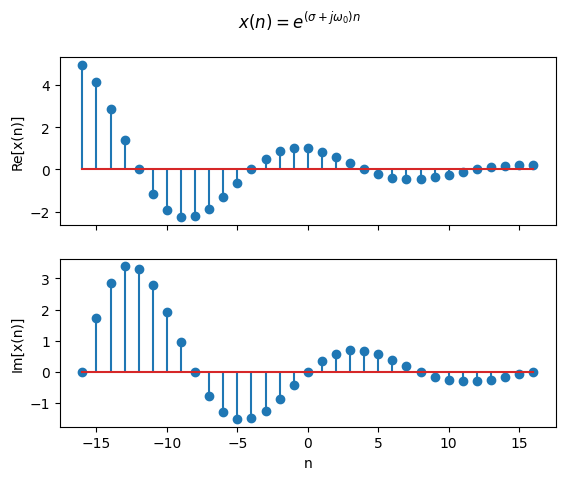

In [12]:
# Plot the sequence
fig, axes = plt.subplots(2,1,sharex=True)
axes[0].stem(seq_n(x, noff_x), x.real)
axes[0].set_ylabel('Re[x(n)]')
axes[1].stem(seq_n(x, noff_x), x.imag)
axes[1].set_xlabel('n')
axes[1].set_ylabel('Im[x(n)]')
fig.suptitle('$ x(n) = e^{(\sigma+j\omega_0)n} $');

另外一种常见的图形表示是以时间（$n$）为横轴，分别画出幅度、相位：

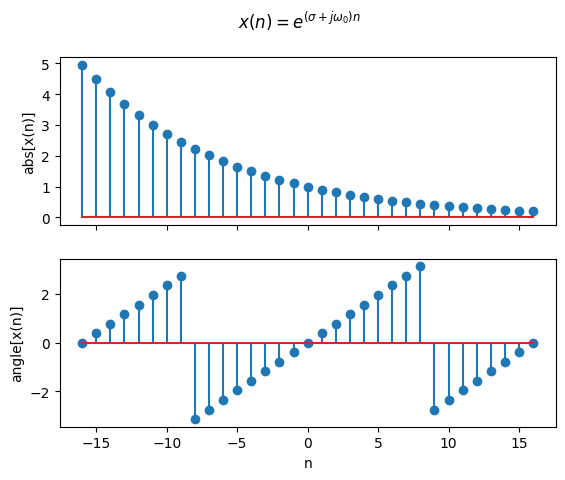

In [13]:
# Plot the sequence
fig, axes = plt.subplots(2,1,sharex=True)
axes[0].stem(seq_n(x, noff_x), np.absolute(x))
axes[0].set_ylabel('abs[x(n)]')
axes[1].stem(seq_n(x, noff_x), np.angle(x))
axes[1].set_xlabel('n')
axes[1].set_ylabel('angle[x(n)]')
fig.suptitle('$ x(n) = e^{(\sigma+j\omega_0)n} $');

但以上两种表示方法都把每个复序列值拆分成两个成分分别在两个图中画出，不能很直观地体现序列值本身的特征，以及序列值之间的不同。因此，另外一种常见的方法是在极坐标中把幅度和相位同时画出：

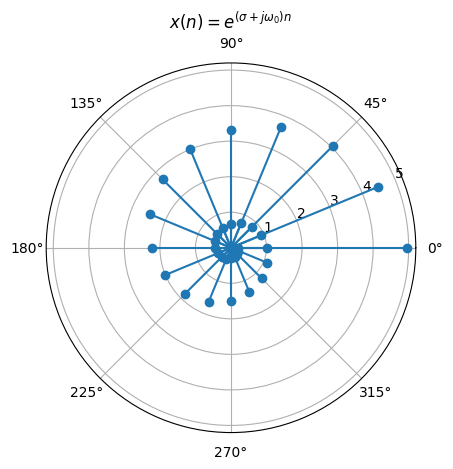

In [14]:
# Plot the sequence
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.stem(np.angle(x), np.absolute(x))
ax.set_title('$ x(n) = e^{(\sigma+j\omega_0)n} $');

但上图又带来一个缺点：不能直观体现时间（$n$）的信息，也就是序列值的先后关系。因此，我们可以利用三维空间，同时把时间（$n$）、相位、幅度的信息展示出来：

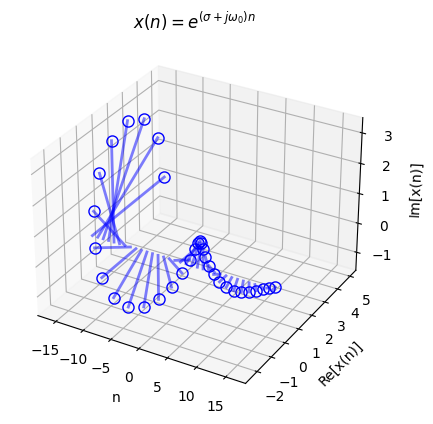

In [15]:
# Plot the seqeunce
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
stem_complex(ax, seq_n(x, noff_x), x.real, x.imag)
ax.set_xlabel('n')
ax.set_ylabel('Re[x(n)]')
ax.set_zlabel('Im[x(n)]')
ax.set_title('$ x(n) = e^{(\sigma+j\omega_0)n} $');

### 正弦型序列

$$ x(n)=A \sin{(\omega_0 n + \varphi)} $$

In [16]:
# Define a general function to generate the sequence.
seq_sin = lambda A, omega_0, phi, n_min, n_max: \
    (np.array([A * np.sin(omega_0 * n + phi) for n in range(n_min, n_max+1)]), \
     0 - n_min)

x = [ 2.44929360e-16  3.82683432e-01  7.07106781e-01  9.23879533e-01
  1.00000000e+00  9.23879533e-01  7.07106781e-01  3.82683432e-01
 -1.22464680e-16 -3.82683432e-01 -7.07106781e-01 -9.23879533e-01
 -1.00000000e+00 -9.23879533e-01 -7.07106781e-01 -3.82683432e-01
  0.00000000e+00  3.82683432e-01  7.07106781e-01  9.23879533e-01
  1.00000000e+00  9.23879533e-01  7.07106781e-01  3.82683432e-01
  1.22464680e-16 -3.82683432e-01 -7.07106781e-01 -9.23879533e-01
 -1.00000000e+00 -9.23879533e-01 -7.07106781e-01 -3.82683432e-01
 -2.44929360e-16] , noff_x = 16


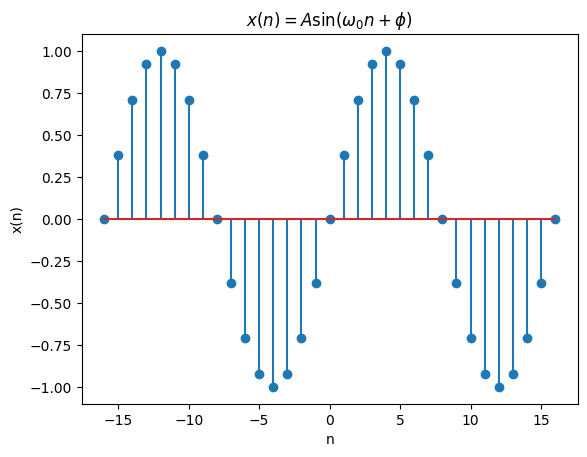

In [17]:
# Generate the sequence
(x, noff_x) = seq_sin(A = 1, omega_0 = np.pi/8, phi = 0, n_min = -16, n_max = 16)

print("x =", x, ", noff_x =", noff_x)

# Plot the sequence
fig, ax = plt.subplots()
ax.stem(seq_n(x, noff_x), x)
ax.set_xlabel('n')
ax.set_ylabel('x(n)')
ax.set_title('$ x(n) = A \sin(\omega_0 n + \phi) $');

#### 各种频率之间的关系

设正弦型序列 $x(n)$ 是模拟正弦信号 $x_a(t)$ 的采样序列，并定义以下符号：

- $f$：正弦信号的**频率**，单位是 $\text{Hz}$
- $\Omega$：正弦信号的**模拟角频率**，单位是 $\text{rad/s}$
- $f_s$：**采样频率**，单位是 $\text{Hz}$
- $\omega$：正弦序列的**数字角频率**，单位是 $\text{rad}$

则这些频率之间的关系为：

$$ \omega = \Omega T = \Omega /f_s = 2\pi f/f_s $$


In [18]:
# Define a general function to compute the signal value for an analog sine wave at any given time t.
analog_sin = lambda A, Omega_0, phi, t: A * np.sin(Omega_0 * t + phi)

为方便后续重复使用，定义一个通用的正弦作图函数，把正弦信号和它的采样正弦型序列画在同一个坐标系中。

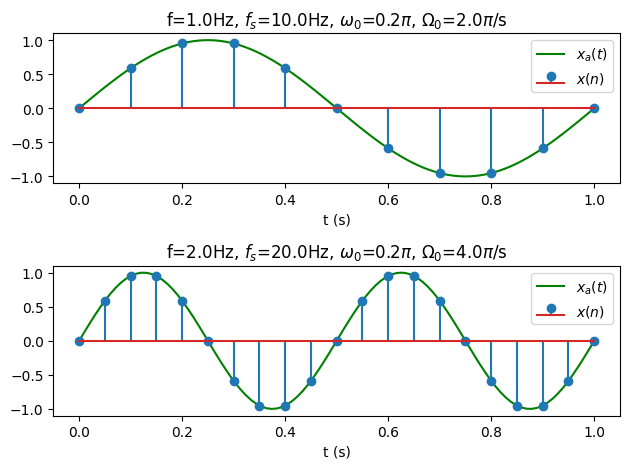

In [19]:
def plot_sin(ax, t_max, A, f, f_s, phi):

    # Plot the analog signal x_a(t)
    Omega_0 = 2 * np.pi * f
    t = np.linspace(0, t_max, 100)
    x_a = analog_sin(A = A, Omega_0 = Omega_0, phi = phi, t = t)
    ax.plot(t, x_a, 'g', label='$ x_a(t) $')

    # Plot the sequence x(n)
    omega_0 = Omega_0 / f_s    # Note: omega_0 and Omega_0 are two different variables!
    n_max = int(t_max * f_s)
    (x, noff_x) = seq_sin(A = A, omega_0 = omega_0, phi = phi, n_min = 0, n_max = n_max)
    ax.stem(seq_n(x, noff_x)/f_s, x, label='$ x(n) $')

    ax.set_xlabel('t (s)')
    ax.legend()
    ax.set_title('f=%.1fHz, $f_s$=%.1fHz, $\omega_0$=%.1f$\pi$, $\Omega_0$=%.1f$\pi$/s' % (f, f_s, omega_0/np.pi, Omega_0/np.pi))

fig, axes = plt.subplots(2,1)
plot_sin(axes[0], t_max=1, A=1, f=1, f_s=10, phi=0)
plot_sin(axes[1], t_max=1, A=1, f=2, f_s=20, phi=0)
fig.tight_layout()

【要点】

- 数字角频率 $\omega$ 反映的是正弦型序列值变化的相对速度（相对于一个周期 $2\pi$ 来说）。$\omega$ 越大，只需要经过越少序列值就完成一个周期。
- 由于计算机中的存储和计算都是离散的数值，是不可能画出真正的模拟信号的。因此画出的所谓的“正弦信号”，也只不过是时间上的离散间隔非常小的正弦型序列，让用户看到像是“连续”而已。

【作业1.1.5-1】（选做）

已知某正弦序列$x(n)$的周期$N=5$，序列在$0 \leqslant n < N $之间的数值如下：
$$\{\underline{0}, 0.951, 0.588, -0.588, -0.951\}$$
 
1. 若此序列是对模拟正弦信号的采样后得到的结果，问此序列是否代表唯一的一个模拟正弦信号？
   - 若是，请说明理据。写出该模拟正弦信号的数学表达式，并作图。
   - 若不是，请至少写出所代表的两个模拟正弦信号的表达式，并作图。

  （注：作图时，需要将模拟正弦信号和该序列值画在同一坐标系上。）

2. 此序列是否可能代表用两个不同的采样频率，对同一模拟正弦信号采样后得到的结果？

## 1.1.6 序列的周期性

正弦序列成为周期性序列的条件

$$ x(n) = A \sin (\omega_0 n + \varphi) $$

因为
$$ \omega = 2\pi f/f_s $$
则
$$ \frac{2\pi}{\omega_0} = \frac{2\pi}{2\pi f/f_s} = \frac{f_s}{f} $$

所以有：
- 当 $f_s/f$ 是整数或有理数时，正弦序列是“周期性”的。
- 当 $f_s/f$ 是无理数时，正弦序列是“非周期性”的。


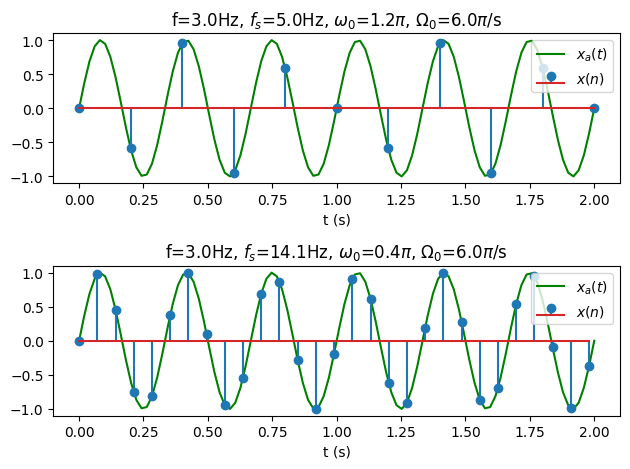

In [20]:
fig, axes = plt.subplots(2,1)
plot_sin(axes[0], t_max=2, A=1, f=3, f_s=5, phi=0)
plot_sin(axes[1], t_max=2, A=1, f=3, f_s=np.sqrt(2)*10, phi=0)
fig.tight_layout()

【作业1.1.6-1】

判断下列每个序列是否是周期性的。若是周期性的，试确定其周期。

1. $ x(n) = \sin((13/3)\pi n) $
2. $ x(n) = \sin(3 \pi n) + \cos( 15 n) $
3. $ x(n) = e^{j(n/6-\pi)} $
4. $ x(n) = e^{j3 \pi n/4} + e^{j5 \pi n/7} $

注：只需要理论推导。推导过程用 Markdown + LaTex 语法书写。

**蓝天宇2022101937物联网工程**

**理论推导如下：**

1. 对于序列 $ x(n) = \sin\left(\frac{13}{3}\pi n\right) $，因为正弦函数是周期函数，基本周期为 $2\pi$。需要找到一个正整数 $N$ 使得：

$$
\frac{13}{3}\pi N = 2\pi k
$$

其中 $k$ 也是正整数。

解方程得：

$$
N = \frac{6k}{13}
$$

由于 $k$ 和 $N$ 都是正整数，$N$ 的最小值为 $6$（当 $k=13$ 时）。

**结论：序列 $ x(n) = \sin((13/3)\pi n) $ 是周期性的，其周期为 $6$。**

2. 对于序列 $ x(n) = \sin(3\pi n) + \cos(15n) $，已知 $\sin(3\pi n)$ 的周期为 $\frac{2\pi}{3\pi} = \frac{2}{3}$，而 $\cos(15n)$ 的周期为 $\frac{2\pi}{15} = \frac{2}{15}$。为了找到这两个函数的共同周期，需要找到一个正整数 $N$，使得：

$$
N = k_1 \cdot \frac{2}{3} = k_2 \cdot \frac{2}{15}
$$

其中 $k_1$ 和 $k_2$ 都是正整数。

通过求解，得到 $N = 2$（当 $k_1 = 3$ 且 $k_2 = 15$ 时）。

**结论：序列 $ x(n) = \sin(3 \pi n) + \cos( 15 n) $ 是周期性的，其周期为 $2$。**

3. 对于序列 $ x(n) = e^{j(n/6-\pi)} $，已知这是一个复指数函数。复指数函数 $ e^{j\theta} $ 是周期性的，其周期为 $2\pi$。因此需要找到一个正整数 $N$ 使得：

$$
\frac{N}{6} = 2\pi k
$$

解方程得： $N = 12\pi k$。由于 $k$ 和 $N$ 都是正整数，$N$ 的最小值为 $12\pi$（当 $k=1$ 时）。由于 $e^{j\theta}$ 的周期是 $2\pi$，得： $ x(n) $ 的周期为 $6$。

**结论：序列 x(n) = e^{j(n/6-\pi)} $ 是周期性的，其周期为 $6$。**

4. 对于序列 $ x(n) = e^{j3\pi n/4} + e^{j5\pi n/7} $，需要找到两个复指数函数的共同周期。这意味着需要找到一个正整数 $N$，使得：

$$
\frac{3\pi N}{4} = 2\pi k_1
$$

和

$$
\frac{5\pi N}{7} = 2\pi k_2
$$

其中 $k_1$ 和 $k_2$ 都是正整数。

求解这两个方程得： 
$N = 28$（当 $k_1 = 21$ 且 $k_2 = 8$ 时）。

**结论：序列 $ x(n) = e^{j3 \pi n/4} + e^{j5 \pi n/7} $ 是周期性的，其周期为 $28$。**

